In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dsD = xr.open_dataset('/home/lbaker/Documents/Projects/Dedalus_SWGLM/data/back_forward_filtered_z_omega_crit_2_T20_256.nc',decode_times=False)

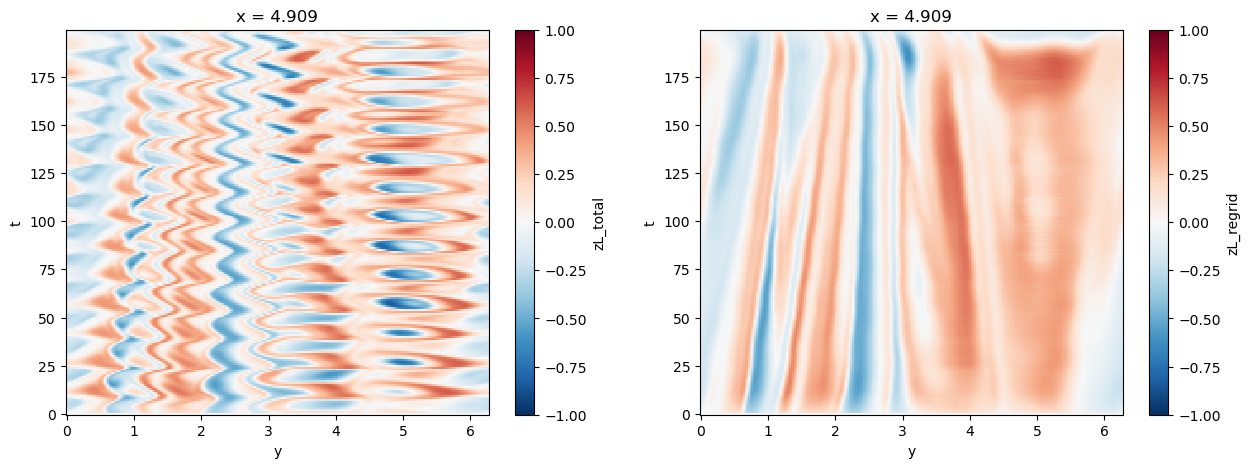

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(15, 5))
dsD.zL_total[:,200,:].plot(ax=ax[0],vmin = -1, vmax = 1, cmap= 'RdBu_r')
dsD.zL_regrid[:,200,:].plot(ax=ax[1],vmin = -1, vmax = 1, cmap= 'RdBu_r')

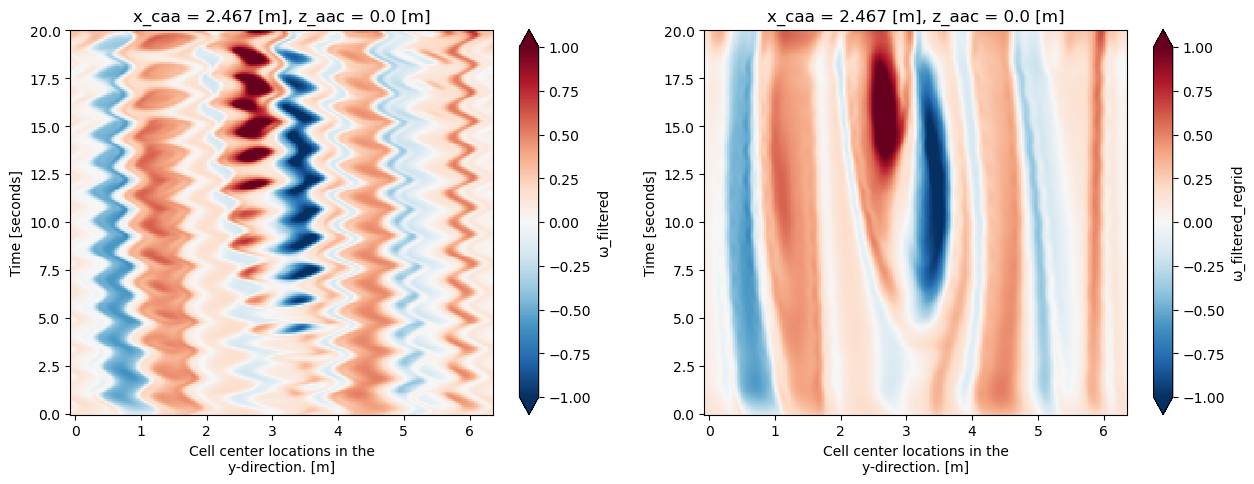

In [9]:
dsO = xr.open_dataset('combined_output.nc',decode_times=False)
fig, ax = plt.subplots(1,2, figsize=(15, 5))
dsO.ω_filtered[:,0,:,103].plot(ax=ax[0],vmin = -1, vmax = 1, cmap= 'RdBu_r')
dsO.ω_filtered_regrid[:,0,:,103].plot(ax=ax[1],vmin = -1, vmax = 1, cmap= 'RdBu_r')


In [5]:
dsO

<xarray.Dataset>
Dimensions:            (time: 201, y_afa: 262, x_faa: 262, x_caa: 262,
                        y_aca: 262, z_aac: 1, z_aaf: 1)
Coordinates:
  * time               (time) float64 0.0 0.1 0.2 0.3 ... 19.7 19.8 19.9 20.0
  * y_afa              (y_afa) float32 -0.07363 -0.04909 ... 6.308 6.332
  * x_faa              (x_faa) float32 -0.07363 -0.04909 ... 6.308 6.332
  * x_caa              (x_caa) float32 -0.06136 -0.03682 -0.01227 ... 6.32 6.345
  * y_aca              (y_aca) float32 -0.06136 -0.03682 -0.01227 ... 6.32 6.345
  * z_aac              (z_aac) float32 0.0
  * z_aaf              (z_aaf) float32 0.0
Data variables: (12/20)
    dx_caa             float32 ...
    dx_faa             float32 ...
    dy_aca             float32 ...
    dy_afa             float32 ...
    dz_aac             float32 ...
    dz_aaf             float32 ...
    ...                 ...
    Lz                 float64 ...
    xi_u               (time, z_aac, y_aca, x_caa) float64 ...
    xi_v               (time, z_aac, y_aca, x_caa) float64 ...
    ω                  (time, z_aac, y_aca, x_caa) float64 ...
    ω_filtered         (time, z_aac, y_aca, x_caa) float64 ...
    ω_filtered_regrid  (time, z_aac, y_aca, x_caa) float64 ...
Attributes:
    Julia:    This file was generated using Julia Version 1.10.9

In [ ]:
# Load in Oceananigans Lagrangian Filter output
dsOfull = xr.open_dataset('combined_output.nc',decode_times=False)

dsO = dsOfull.isel({'x_caa': slice(3,259),'y_aca':slice(3,259)})  

# Load in Dedalus output from the same experiment
dsD = xr.open_dataset('/home/lbaker/Documents/Projects/Dedalus_SWGLM/data/back_forward_filtered_z_omega_crit_2_T20_256.nc',decode_times=False)

FileNotFoundError: [Errno 2] No such file or directory: b'/home/lbaker/Documents/Projects/OceananigansLagrangianFilter/testing/combined_output_init0.nc'

In [58]:
# Look at forward and back of Oceananigans too
dsOfwdfull = xr.open_dataset('forward_output_init0.nc',decode_times=False)
dsObwdfull = xr.open_dataset('backward_output_init0.nc',decode_times=False)

dsOfwd = dsOfwdfull.isel({'x_caa': slice(3,259),'y_aca':slice(3,259)})  
dsObwd = dsObwdfull.isel({'x_caa': slice(3,259),'y_aca':slice(3,259)})


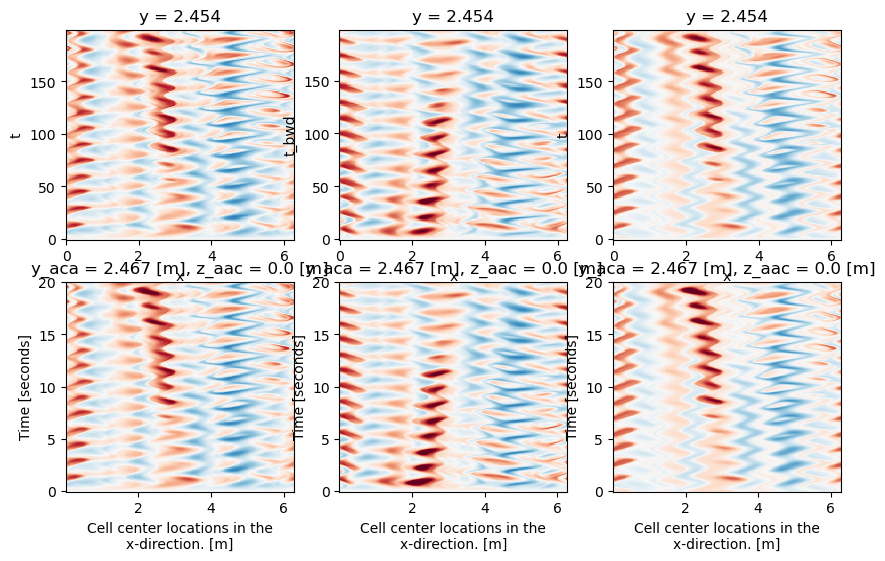

In [59]:
# Original init
fig, ax = plt.subplots(2,3, figsize=(10, 6))
dsD.zL_fwd[:,:,100].plot(ax=ax[0,0], vmin=-0.5, vmax=0.5, cmap='RdBu_r', add_colorbar=False)
dsD.zL_bwd[:,:,100].plot(ax=ax[0,1], vmin=-0.5, vmax=0.5, cmap='RdBu_r', add_colorbar=False)
dsD.zL_total[:,:,100].plot(ax=ax[0,2], vmin=-1, vmax=1, cmap='RdBu_r', add_colorbar=False)

dsOfwd.ω_filtered[:,0,100,:].plot(ax=ax[1,0], vmin=-0.5, vmax=0.5, cmap='RdBu_r', add_colorbar=False)
dsObwd.ω_filtered[:,0,100,:].plot(ax=ax[1,1], vmin=-0.5, vmax=0.5, cmap='RdBu_r', add_colorbar=False)  
dsO.ω_filtered[:,0,100,:].plot(ax=ax[1,2], vmin=-1, vmax=1, cmap='RdBu_r', add_colorbar=False)

[(0.0, 5.0), (0.0, 5.0), (0.0, 5.0), (0.0, 5.0), (0.0, 5.0), (0.0, 5.0)]

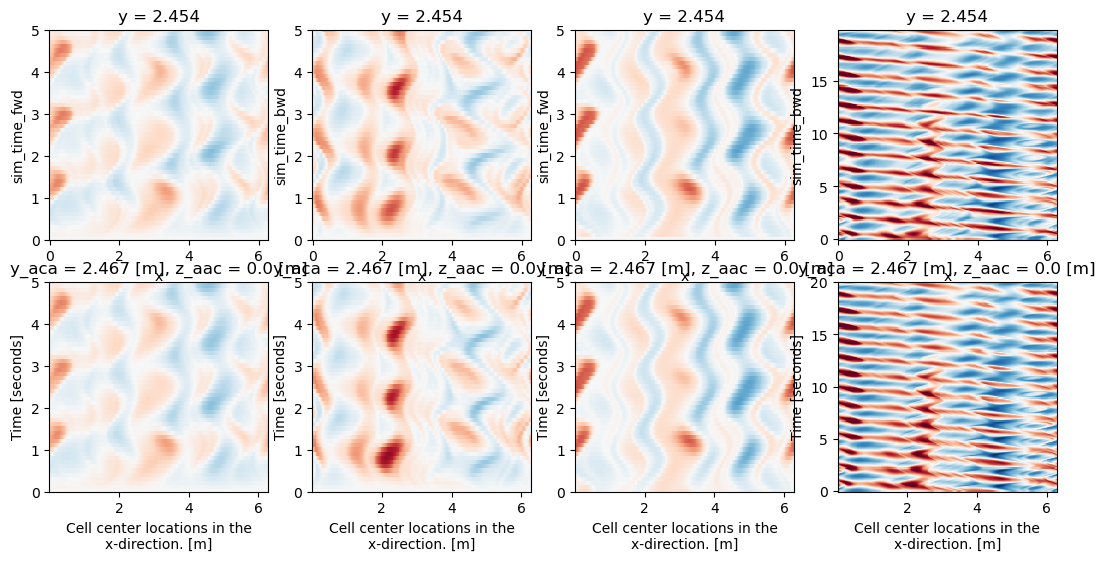

In [60]:
# Zero backward init
fig, ax = plt.subplots(2,4, figsize=(13, 6))
dsD.zL_fwd[:,:,100].plot(ax=ax[0,0], y='sim_time_fwd', vmin=-0.8, vmax=0.8, cmap='RdBu_r', add_colorbar=False)
dsD.zL_bwd[:,:,100].plot(ax=ax[0,1], y='sim_time_bwd', vmin=-0.8, vmax=0.8, cmap='RdBu_r', add_colorbar=False)
dsD.zL_total[:,:,100].plot(ax=ax[0,2], y='sim_time_fwd', vmin=-1, vmax=1, cmap='RdBu_r', add_colorbar=False)
dsD.z_int_bwd[:,:,100].plot(ax=ax[0,3], y='sim_time_bwd', vmin=-1, vmax=1, cmap='RdBu_r', add_colorbar=False)


dsOfwd.ω_filtered[:,0,100,:].plot(ax=ax[1,0], vmin=-0.8, vmax=0.8, cmap='RdBu_r', add_colorbar=False)
dsObwd.ω_filtered[:,0,100,:].plot(ax=ax[1,1], vmin=-0.8, vmax=0.8, cmap='RdBu_r', add_colorbar=False)  
dsO.ω_filtered[:,0,100,:].plot(ax=ax[1,2], vmin=-1, vmax=1, cmap='RdBu_r', add_colorbar=False)
dsObwd.ω[:,0,100,:].plot(ax=ax[1,3], vmin=-1, vmax=1, cmap='RdBu_r', add_colorbar=False)

[ax[i,j].set_ylim([0,5]) for i in range(2) for j in range(3)]  # Set y-limits for the first row


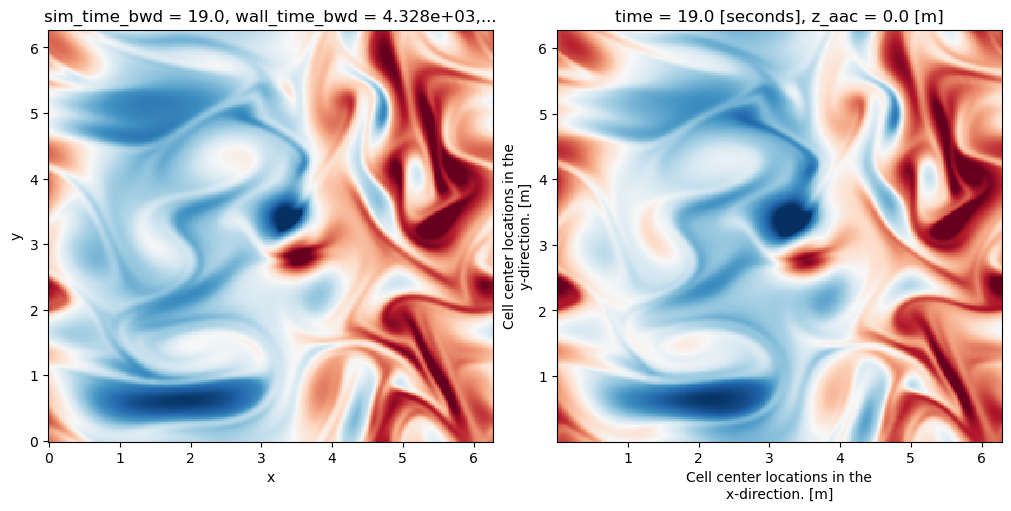

In [82]:

it=190
fig, ax = plt.subplots(1,2,figsize=(10,5),constrained_layout=True)
dsD.z_int_bwd[it,:,:].plot(x='x',ax=ax[0], vmin=-1, vmax=1, cmap='RdBu_r', add_colorbar=False)
dsObwd.ω[it,0,:,:].plot(ax=ax[1], vmin=-1, vmax=1, cmap='RdBu_r', add_colorbar=False)

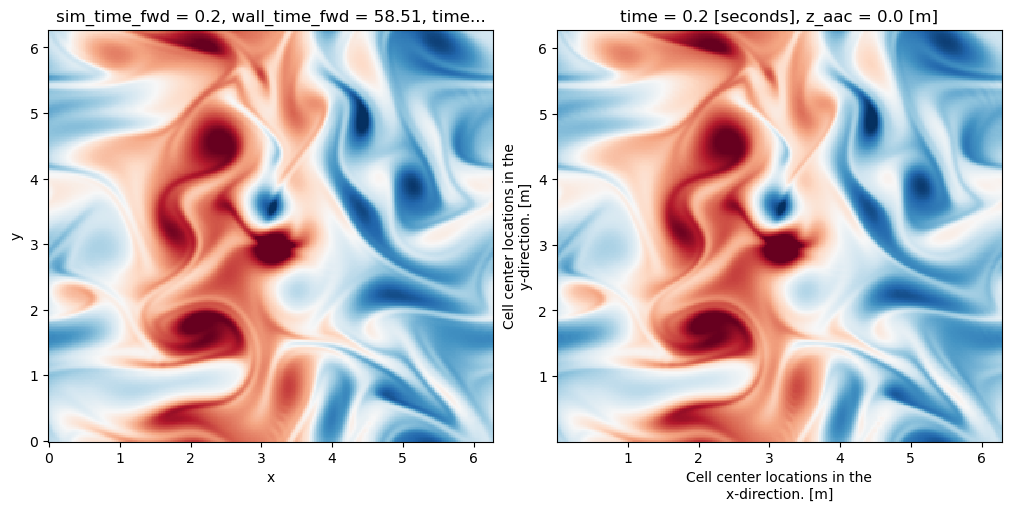

In [106]:
it=2
fig, ax = plt.subplots(1,2,figsize=(10,5),constrained_layout=True)
dsD.z_fwd[it,:,:].plot(x='x',ax=ax[0], vmin=-1, vmax=1, cmap='RdBu_r', add_colorbar=False)
dsOfwd.ω[it,0,:,:].plot(ax=ax[1], vmin=-1, vmax=1, cmap='RdBu_r', add_colorbar=False)

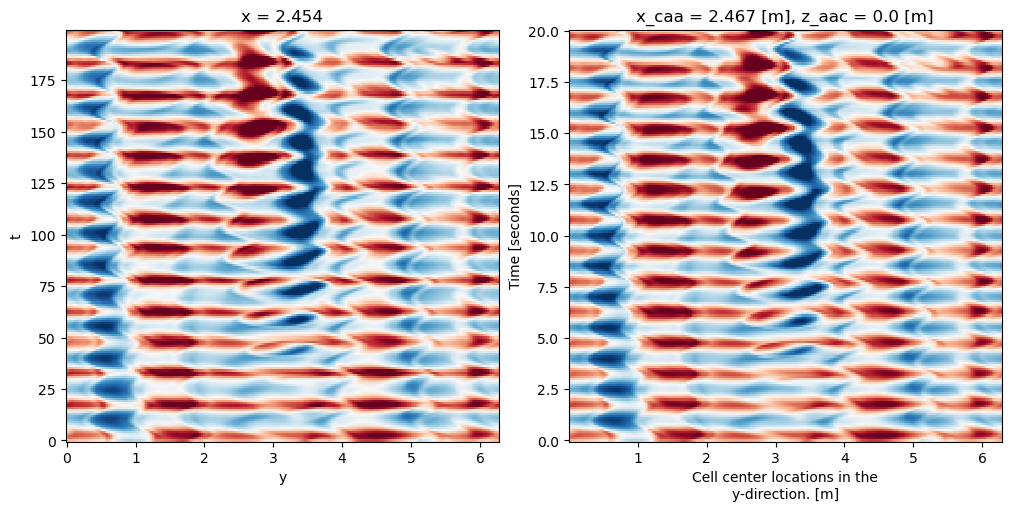

In [107]:
fig, ax = plt.subplots(1,2,figsize=(10,5),constrained_layout=True)
dsD.z_fwd[:,100,:].plot(ax=ax[0], vmin=-1, vmax=1, cmap='RdBu_r', add_colorbar=False)
dsOfwd.ω[:,0,:,100].plot(ax=ax[1], vmin=-1, vmax=1, cmap='RdBu_r', add_colorbar=False)

In [90]:
dsObwd.time
dsD.sim_time_bwd.values

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
        8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
        9.9, 10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9,
       11. , 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12. ,
       12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. , 13.1,
       13.2, 13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1, 14.2,
       14.3, 14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 15

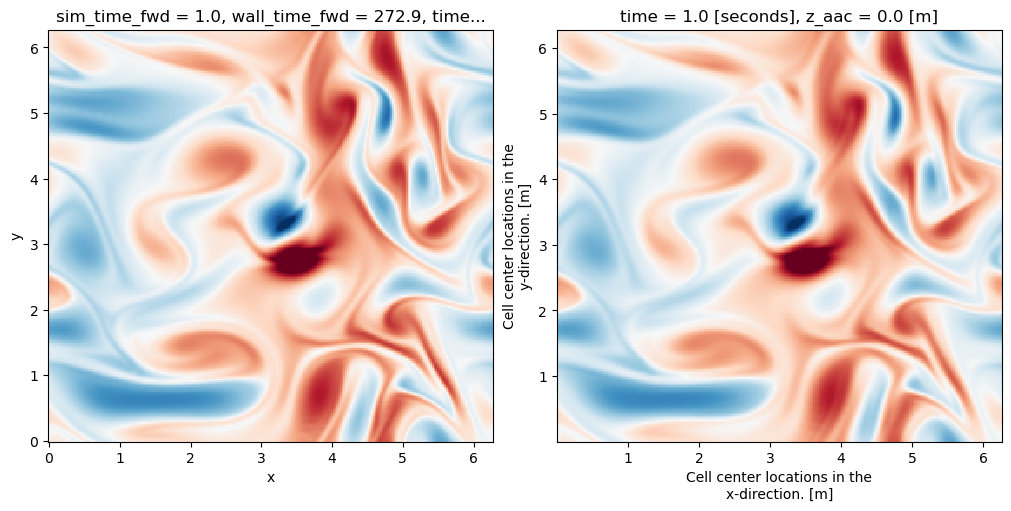

In [52]:
it=10
fig, ax = plt.subplots(1,2,figsize=(10,5),constrained_layout=True)
dsD.zL_fwd[it,:,:].plot(x='x',ax=ax[0], vmin=-0.5, vmax=0.5, cmap='RdBu_r', add_colorbar=False)
dsOfwd.ω_filtered[it,0,:,:].plot(ax=ax[1], vmin=-0.5, vmax=0.5, cmap='RdBu_r', add_colorbar=False)

In [57]:
dsOfwd.ω_filtered[it,0,:,:].shape

(256, 255)

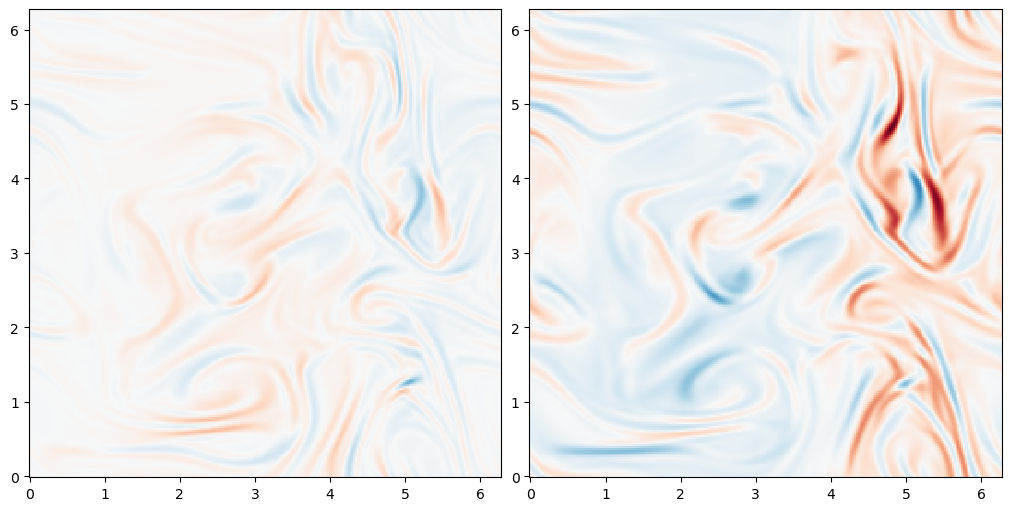

In [73]:
it=100
fig, ax = plt.subplots(1,2,figsize=(10,5),constrained_layout=True)
ax[0].pcolormesh(dsD.x,dsD.y,dsD.zL_fwd[it,:,:].transpose().values - dsOfwd.ω_filtered[it,0,:,:].values, vmin=-0.5, vmax=0.5, cmap='RdBu_r')
ax[1].pcolormesh(dsD.x,dsD.y,dsD.zL_bwd[it,:,:].transpose().values - dsObwd.ω_filtered[it,0,:,:].values, vmin=-0.5, vmax=0.5, cmap='RdBu_r')

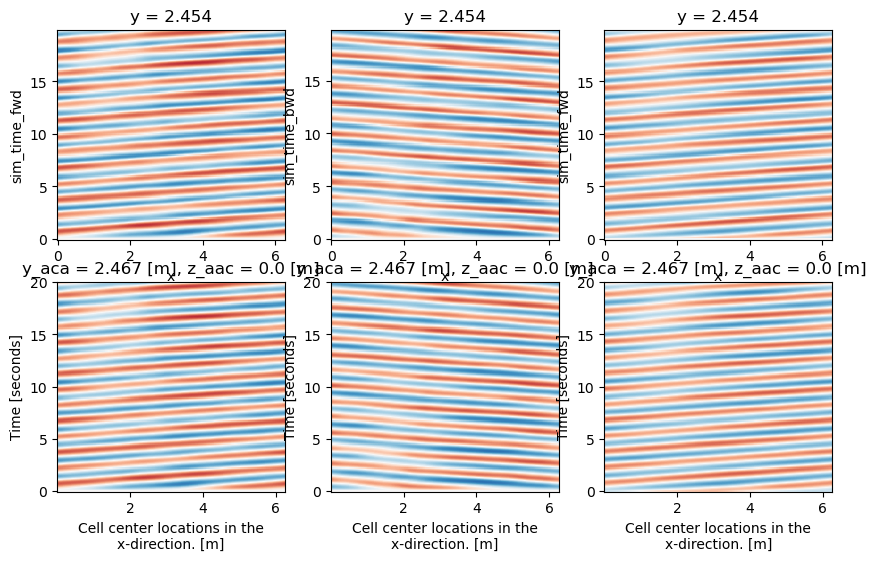

In [37]:
# Original init
fig, ax = plt.subplots(2,3, figsize=(10, 6))
dsD.xi_x_fwd[:,:,100].plot(ax=ax[0,0], y='sim_time_fwd', vmin=-0.2, vmax=0.2, cmap='RdBu_r', add_colorbar=False)
dsD.xi_x_bwd[:,:,100].plot(ax=ax[0,1], y='sim_time_bwd', vmin=-0.2, vmax=0.2, cmap='RdBu_r', add_colorbar=False)
dsD.xi_x_total[:,:,100].plot(ax=ax[0,2],y='sim_time_fwd',  vmin=-0.4, vmax=0.4, cmap='RdBu_r', add_colorbar=False)

dsOfwd.xi_u[:,0,100,:].plot(ax=ax[1,0], vmin=-0.2, vmax=0.2, cmap='RdBu_r', add_colorbar=False)
dsObwd.xi_u[:,0,100,:].plot(ax=ax[1,1], vmin=-0.2, vmax=0.2, cmap='RdBu_r', add_colorbar=False)  
dsO.xi_u[:,0,100,:].plot(ax=ax[1,2], vmin=-0.4, vmax=0.4, cmap='RdBu_r', add_colorbar=False)

[(0.0, 5.0), (0.0, 5.0), (0.0, 5.0), (0.0, 5.0), (0.0, 5.0), (0.0, 5.0)]

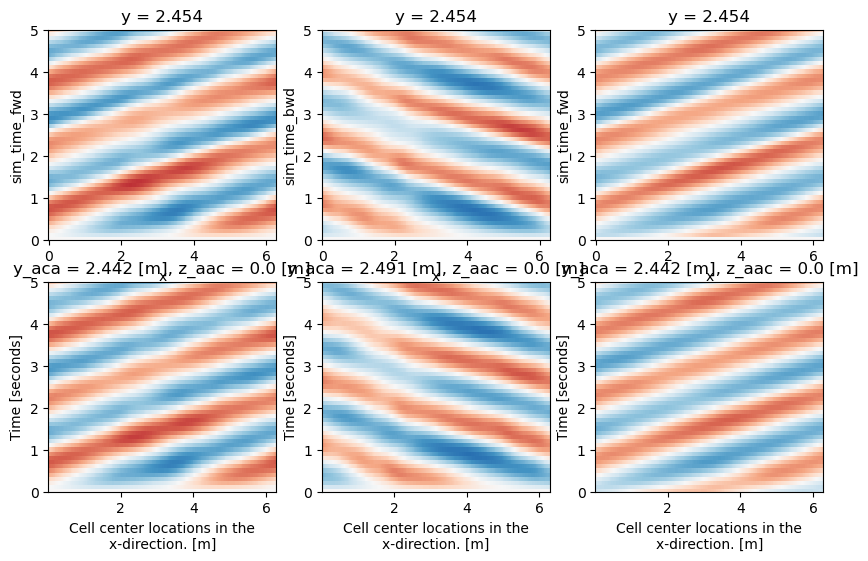

In [69]:
# Zero backward init
fig, ax = plt.subplots(2,3, figsize=(10, 6))
dsD.xi_x_fwd[:,:,100].plot(ax=ax[0,0],y='sim_time_fwd', vmin=-0.2, vmax=0.2, cmap='RdBu_r', add_colorbar=False)
dsD.xi_x_bwd[:,:,100].plot(ax=ax[0,1],y='sim_time_bwd', vmin=-0.2, vmax=0.2, cmap='RdBu_r', add_colorbar=False)
dsD.xi_x_total[:,:,100].plot(ax=ax[0,2],y='sim_time_fwd', vmin=-0.4, vmax=0.4, cmap='RdBu_r', add_colorbar=False)

dsOfwd.xi_u[:,0,99,:].plot(ax=ax[1,0], vmin=-0.2, vmax=0.2, cmap='RdBu_r', add_colorbar=False)
#(dsObwd.xi_u[:,0,99,:] + (dsObwd.xi_u[:,0,100,:] - dsObwd.xi_u[:,0,99,:])/(dsObwd.y_aca[100] - dsObwd.y_aca[99])*(2.454 - dsObwd.y_aca[99])).plot(ax=ax[1,1], vmin=-0.2, vmax=0.2, cmap='RdBu_r', add_colorbar=False)  
dsObwd.xi_u[:,0,101,:].plot(ax=ax[1,1], vmin=-0.2, vmax=0.2, cmap='RdBu_r', add_colorbar=False)  
dsO.xi_u[:,0,99,:].plot(ax=ax[1,2], vmin=-0.4, vmax=0.4, cmap='RdBu_r', add_colorbar=False)
[ax[i,j].set_ylim([0,5]) for i in range(2) for j in range(3)]  # Set y-limits for the first row


In [32]:
1/(dsObwd.y_aca[100] - dsObwd.y_aca[99])*(2.454 - dsObwd.y_aca[99])

<xarray.DataArray 'y_aca' ()>
array(0.48495314)
Coordinates:
    y_aca    float32 2.442

[Text(0.5, 0, ''),
 Text(0.5, 0, ''),
 Text(0.5, 0, ''),
 Text(0.5, 0, ''),
 Text(0.5, 0, ''),
 Text(0.5, 0, '')]

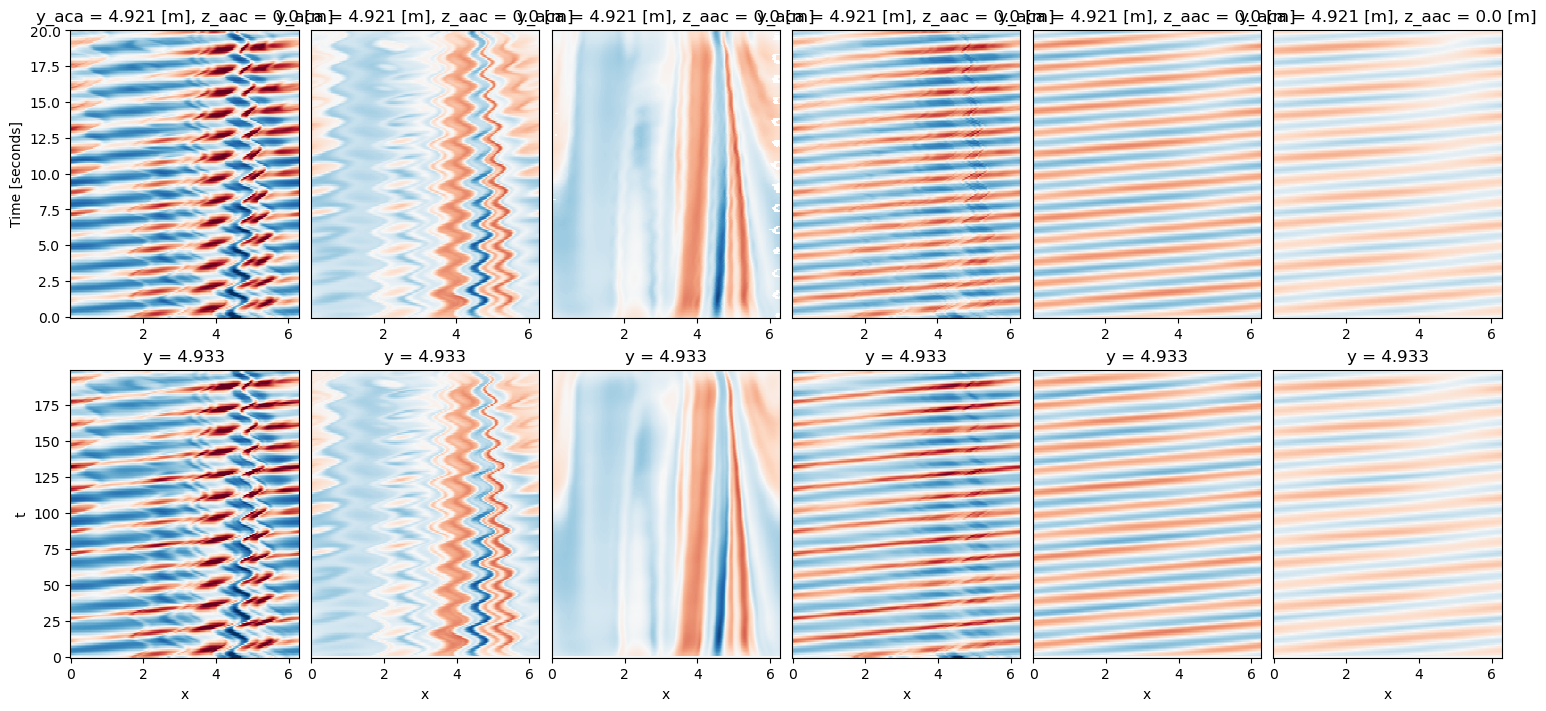

In [70]:
# Polynomial(), 10
iy = 200
fig, ax = plt.subplots(2,6,figsize = (15,7),constrained_layout=True)
dsO.ω[:,0,iy,:].plot(ax=ax[0,0], vmin=-1, vmax=1, cmap='RdBu_r', add_colorbar=False)
dsO.ω_filtered[:,0,iy,:].plot(ax=ax[0,1], vmin=-1, vmax=1, cmap='RdBu_r', add_colorbar=False)
dsO.ω_filtered_regrid[:,0,iy,:].plot(ax=ax[0,2], vmin=-1, vmax=1, cmap='RdBu_r', add_colorbar=False)
(dsO.ω - dsO.ω_filtered)[:,0,iy,:].plot(ax=ax[0,3], vmin=-1, vmax=1, cmap='RdBu_r', add_colorbar=False)
dsO.xi_u[:,0,iy,:].plot(ax=ax[0,4], vmin=-0.5, vmax=0.5, cmap='RdBu_r', add_colorbar=False)
dsO.xi_v[:,0,iy,:].plot(ax=ax[0,5], vmin=-0.5, vmax=0.5, cmap='RdBu_r', add_colorbar=False)

dsD.z_fwd.sel(y=dsO.y_aca[iy].values,method='nearest').plot(ax=ax[1,0], vmin=-1, vmax=1, cmap='RdBu_r', add_colorbar=False)
dsD.zL_total.sel(y=dsO.y_aca[iy].values,method='nearest').plot(ax=ax[1,1], vmin=-1, vmax=1, cmap='RdBu_r', add_colorbar=False)
dsD.zL_regrid.sel(y=dsO.y_aca[iy].values,method='nearest').plot(ax=ax[1,2], vmin=-1, vmax=1, cmap='RdBu_r', add_colorbar=False)
(dsD.z_fwd.sel(y=dsO.y_aca[iy].values,method='nearest') - dsD.zL_total.sel(y=dsO.y_aca[iy].values,method='nearest')).plot(ax=ax[1,3], vmin=-1, vmax=1, cmap='RdBu_r', add_colorbar=False)
dsD.xi_x_total.sel(y=dsO.y_aca[iy].values,method='nearest').plot(ax=ax[1,4], vmin=-0.5, vmax=0.5, cmap='RdBu_r', add_colorbar=False)
dsD.xi_y_total.sel(y=dsO.y_aca[iy].values,method='nearest').plot(ax=ax[1,5], vmin=-0.5, vmax=0.5, cmap='RdBu_r', add_colorbar=False)


[ax[i,j].set_yticks([]) for i in range(2) for j in range(1,6)]
[ax[i,j].set_ylabel('') for i in range(2) for j in range(1,6)]
[ax[0,j].set_xlabel('') for j in range(6)]

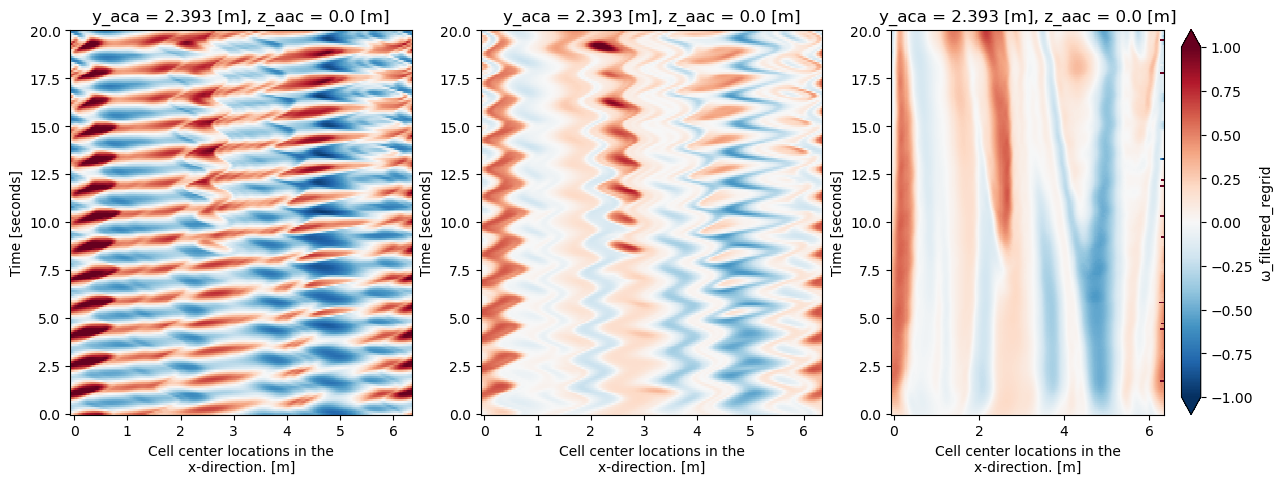

In [25]:
# NN
fig, ax = plt.subplots(1,3,figsize = (15,5))
ds.ω[:,0,100,:].plot(ax=ax[0], vmin=-1, vmax=1, cmap='RdBu_r', add_colorbar=False)
ds.ω_filtered[:,0,100,:].plot(ax=ax[1], vmin=-1, vmax=1, cmap='RdBu_r', add_colorbar=False)
#(ds.ω - ds.ω_filtered)[:,0,100,:].plot(ax=ax[2], vmin=-1, vmax=1, cmap='RdBu_r')
ds.ω_filtered_regrid[:,0,100,:].plot(ax=ax[2], vmin=-1, vmax=1, cmap='RdBu_r')

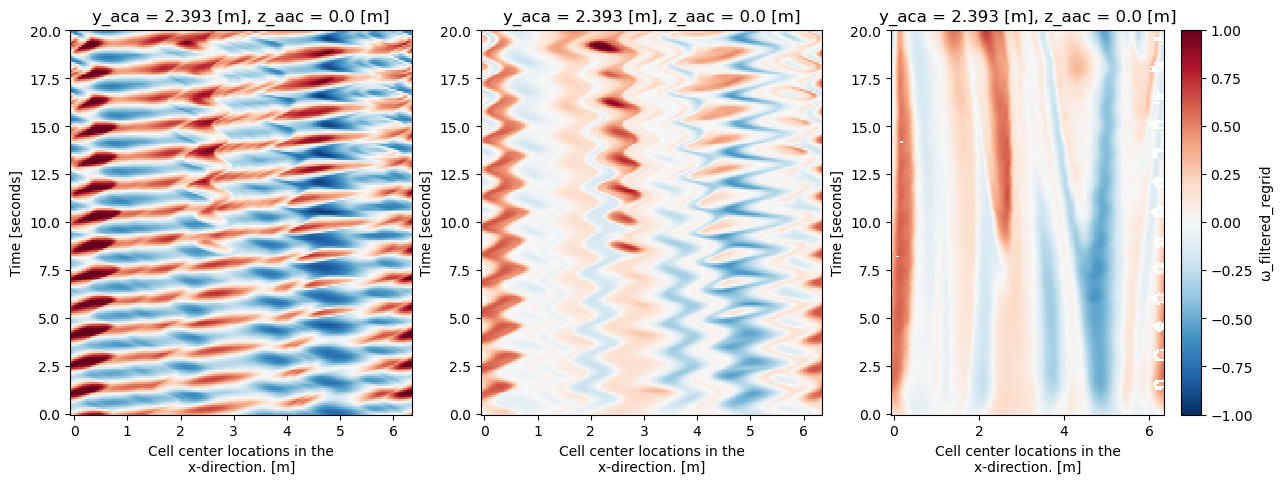

In [27]:
# Kriging(GaussianVariogram(range=grid.Δxᶜᵃᵃ))
fig, ax = plt.subplots(1,3,figsize = (15,5))
ds.ω[:,0,100,:].plot(ax=ax[0], vmin=-1, vmax=1, cmap='RdBu_r', add_colorbar=False)
ds.ω_filtered[:,0,100,:].plot(ax=ax[1], vmin=-1, vmax=1, cmap='RdBu_r', add_colorbar=False)
#(ds.ω - ds.ω_filtered)[:,0,100,:].plot(ax=ax[2], vmin=-1, vmax=1, cmap='RdBu_r')
ds.ω_filtered_regrid[:,0,100,:].plot(ax=ax[2], vmin=-1, vmax=1, cmap='RdBu_r')

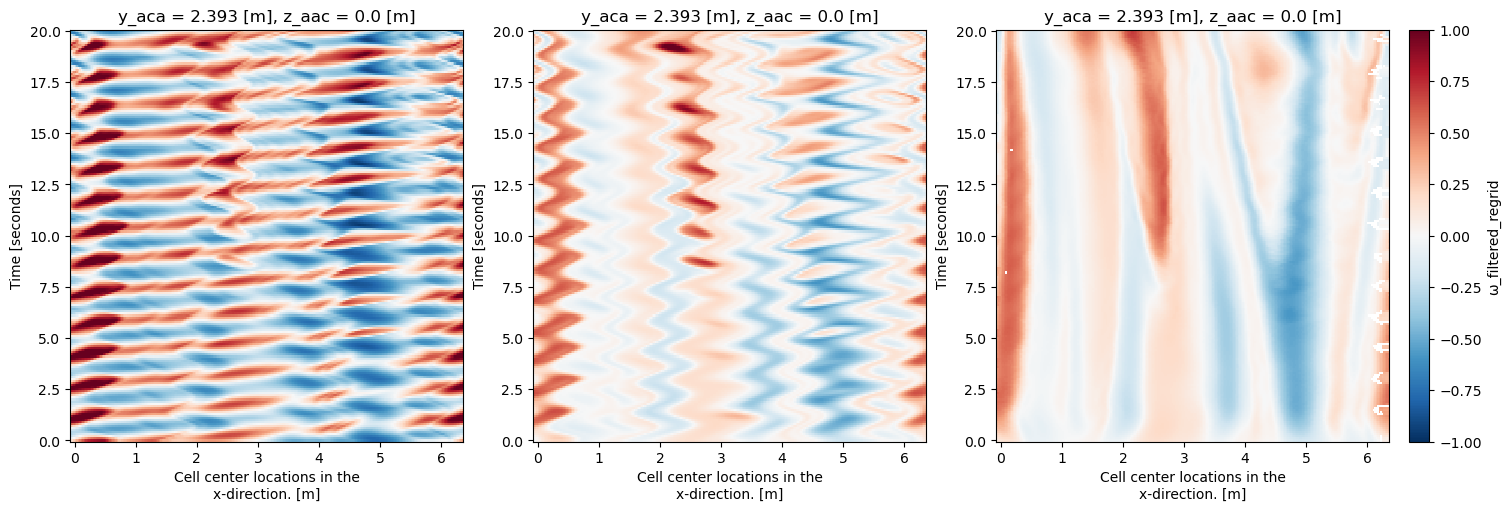

In [52]:
# Kriging(GaussianVariogram(range=grid.Δxᶜᵃᵃ)) freq_c = 1
ds = xr.open_dataset('combined_output_freq_c_1.nc',decode_times=False)

fig, ax = plt.subplots(1,3,figsize = (15,5),constrained_layout=True)
ds.ω[:,0,100,:].plot(ax=ax[0], vmin=-1, vmax=1, cmap='RdBu_r', add_colorbar=False)
ds.ω_filtered[:,0,100,:].plot(ax=ax[1], vmin=-1, vmax=1, cmap='RdBu_r', add_colorbar=False)
#(ds.ω - ds.ω_filtered)[:,0,100,:].plot(ax=ax[2], vmin=-1, vmax=1, cmap='RdBu_r')
ds.ω_filtered_regrid[:,0,100,:].plot(ax=ax[2], vmin=-1, vmax=1, cmap='RdBu_r')

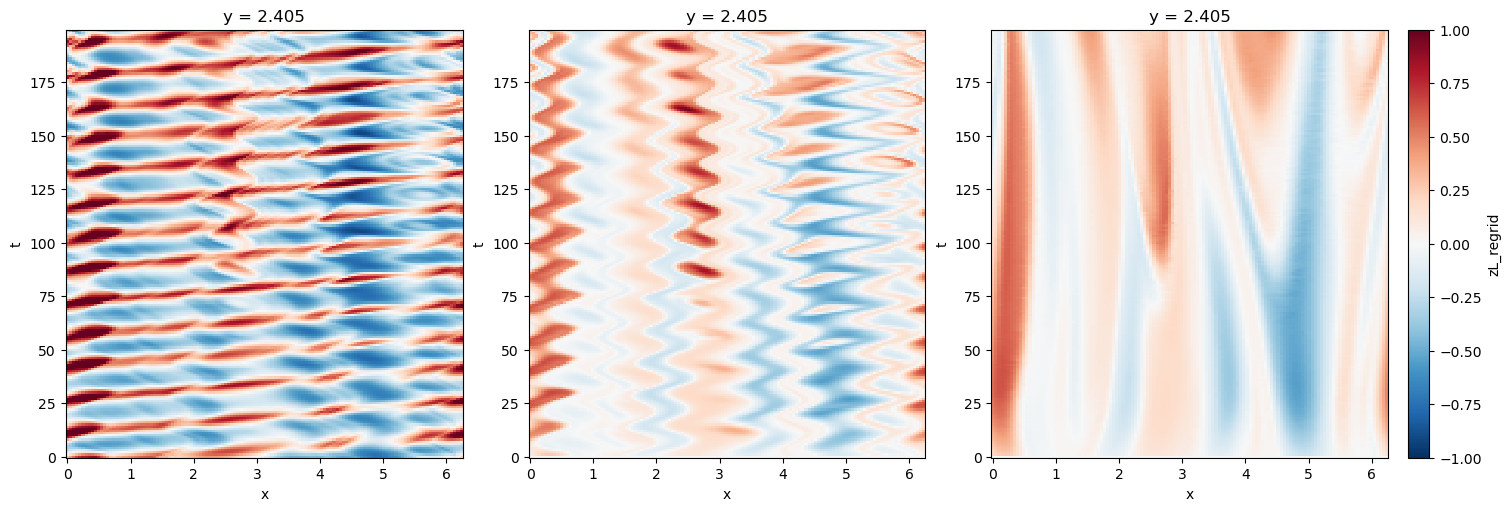

In [68]:
fig, ax = plt.subplots(1,3,figsize = (15,5),constrained_layout=True)
dsD.z_fwd[:200,:,49].plot(ax=ax[0], vmin=-1, vmax=1, cmap='RdBu_r', add_colorbar=False)
dsD.zL_total[:200,:,49].plot(ax=ax[1], vmin=-1, vmax=1, cmap='RdBu_r', add_colorbar=False)
dsD.zL_regrid[:200,:,49].plot(ax=ax[2], vmin=-1, vmax=1, cmap='RdBu_r')


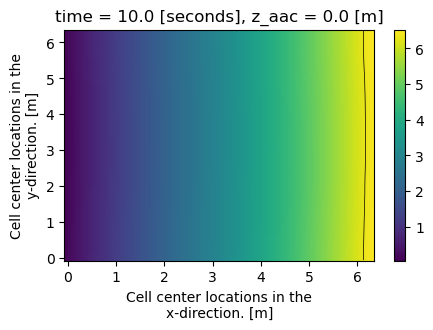

In [5]:
ds = dsOfull.isel({'time':100})
fig, ax = plt.subplots(1,1,figsize = (5,3))
(ds.xi_u[0,:,:]+ds.x_caa).plot(ax=ax)
(ds.xi_u[0,:,:]+ds.x_caa).plot.contour(ax=ax,levels=np.array([0,2*np.pi]), colors='k', linewidths=0.5)


In [42]:
npad = 0
xi_u = ds.xi_u.values
xi_v = ds.xi_v.values
f = ds.ω_filtered.values
x_pad , xi_u_pad_x = pad_periodic(xi_u, ds.x_caa.values, npad, dim=3, halo = 3)
y_pad, xi_u_pad_xy = pad_periodic(xi_u_pad_x, ds.y_aca.values, npad, dim=2, halo = 3)

Xi_u_pad_x = x_pad + xi_u_pad_x +2
Xi_u_pad_xy = x_pad + xi_u_pad_xy +2

In [41]:
def pad_periodic(in_data_array, coord, npad, dim, halo = 0):
    full_shape = in_data_array.shape
    coord_no_halos = coord[halo:full_shape[dim-1]-halo]
    ds = coord_no_halos[1]-coord_no_halos[0]
    coord_pad = np.concatenate((np.linspace(coord_no_halos[0] - npad*ds,coord_no_halos[0] - ds,npad),
                        coord_no_halos, 
                        np.linspace(coord_no_halos[-1]+ds,coord_no_halos[-1]+ds*npad,npad)))
    
    if dim == 1:
        in_data_no_halos = in_data_array[halo:full_shape[0]-halo,:,:]
        data_pad = np.concatenate((in_data_no_halos[-npad:,:,:], in_data_no_halos, in_data_no_halos[:npad,:,:]), axis=0)
    elif dim == 2:
        in_data_no_halos = in_data_array[:,halo:full_shape[1]-halo,:]
        data_pad = np.concatenate((in_data_no_halos[:,-npad:,:], in_data_no_halos, in_data_no_halos[:,:npad,:]), axis=1)
    elif dim == 3:
        in_data_no_halos = in_data_array[:,:,halo:full_shape[2]-halo]
        data_pad = np.concatenate((in_data_no_halos[:,:,-npad:], in_data_no_halos, in_data_no_halos[:,:,:npad]), axis=2)
    else:
        raise ValueError("Invalid dimension specified.")
    
    if npad > 0:
        return coord_pad, data_pad
    else:
        return coord_no_halos, in_data_no_halos

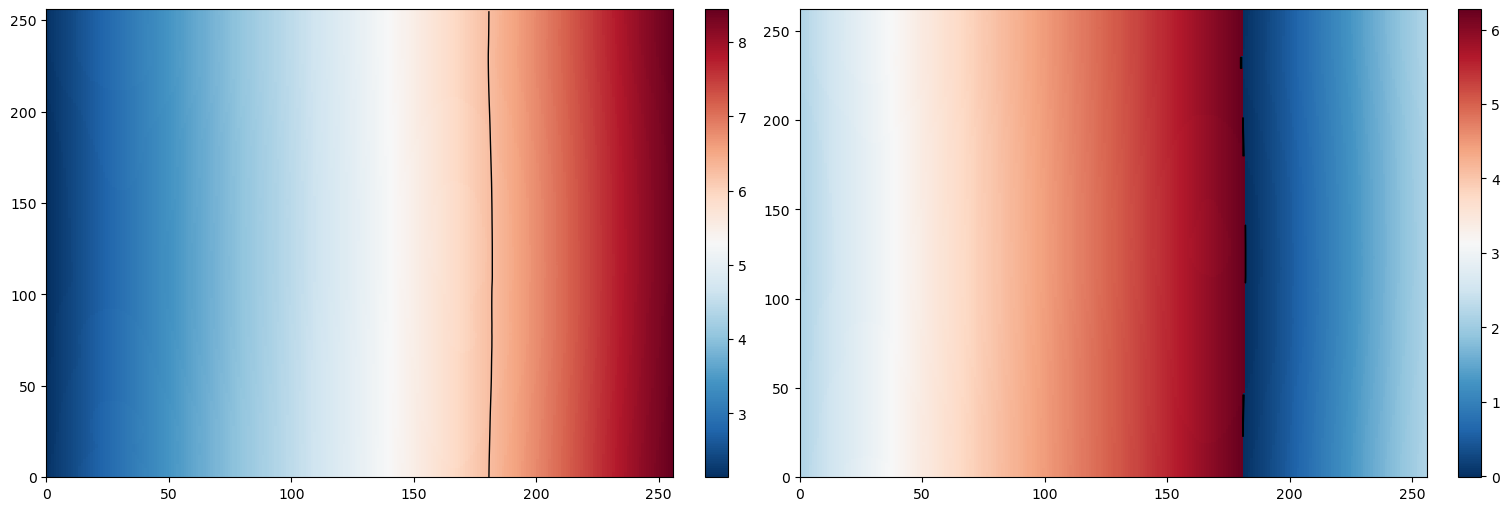

In [44]:

floor_Xi_u = Xi_u_pad_x - np.floor((Xi_u_pad_x - x_pad[0])/(x_pad[-1] - x_pad[0])) * dsO.Lx.values
fig, ax = plt.subplots(1,2,figsize = (15,5),constrained_layout=True)
p0 = ax[0].pcolormesh(Xi_u_pad_xy[0,:,:], cmap='RdBu_r')
ax[0].contour(Xi_u_pad_xy[0,:,:], levels =np.array([0,2*np.pi]), colors='k', linewidths=1)

fig.colorbar(p0,ax=ax[0])
p1 = ax[1].pcolormesh(floor_Xi_u[0,:,:], cmap='RdBu_r')
ax[1].contour(floor_Xi_u[0,:,:], levels =np.array([0,2*np.pi]), colors='k', linewidths=1)
fig.colorbar(p1,ax=ax[1])


In [28]:
dsO

<xarray.Dataset>
Dimensions:            (time: 201, y_afa: 262, x_faa: 262, x_caa: 256,
                        y_aca: 256, z_aac: 1, z_aaf: 1)
Coordinates:
  * time               (time) float64 0.0 0.1 0.2 0.3 ... 19.7 19.8 19.9 20.0
  * y_afa              (y_afa) float32 -0.07363 -0.04909 ... 6.308 6.332
  * x_faa              (x_faa) float32 -0.07363 -0.04909 ... 6.308 6.332
  * x_caa              (x_caa) float32 0.01227 0.03682 0.06136 ... 6.246 6.271
  * y_aca              (y_aca) float32 0.01227 0.03682 0.06136 ... 6.246 6.271
  * z_aac              (z_aac) float32 0.0
  * z_aaf              (z_aaf) float32 0.0
Data variables: (12/20)
    dx_caa             float32 ...
    dx_faa             float32 ...
    dy_aca             float32 ...
    dy_afa             float32 ...
    dz_aac             float32 ...
    dz_aaf             float32 ...
    ...                 ...
    Lz                 float64 ...
    xi_u               (time, z_aac, y_aca, x_caa) float64 ...
    xi_v               (time, z_aac, y_aca, x_caa) float64 ...
    ω                  (time, z_aac, y_aca, x_caa) float64 ...
    ω_filtered         (time, z_aac, y_aca, x_caa) float64 ...
    ω_filtered_regrid  (time, z_aac, y_aca, x_caa) float64 ...
Attributes:
    Julia:    This file was generated using Julia Version 1.10.9

In [55]:
dsO = xr.open_dataset('combined_output_init0.nc',decode_times=False)

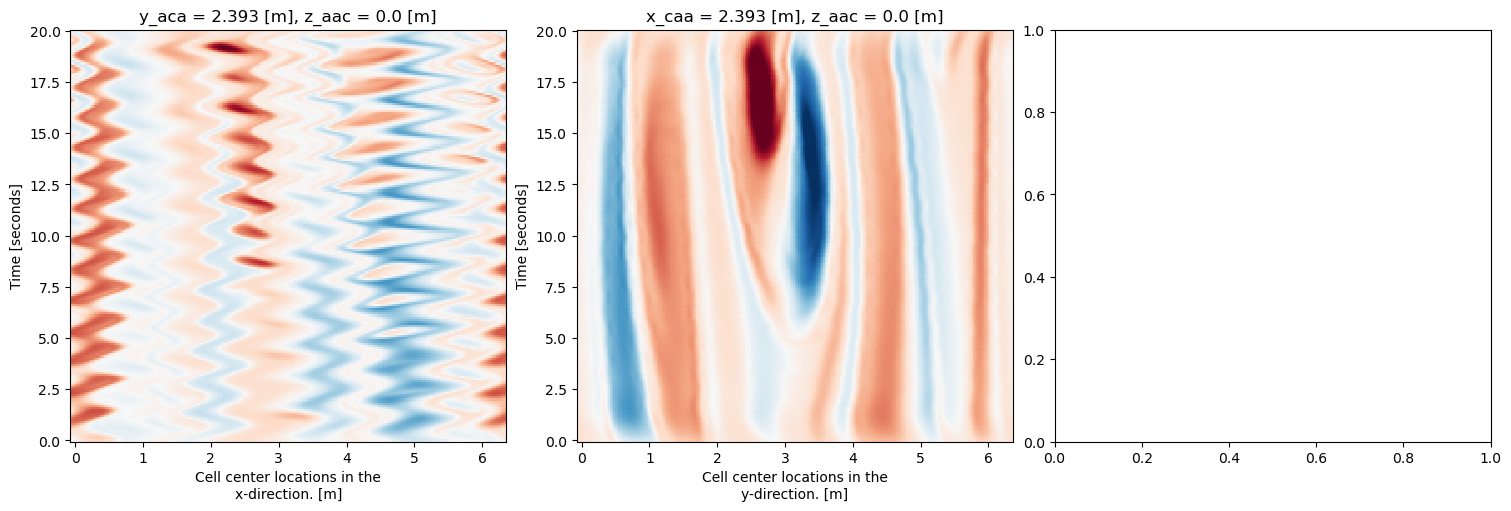

In [54]:
fig, ax = plt.subplots(1,3,figsize = (15,5),constrained_layout=True)
dsO.ω_filtered[:,0,100,:].plot(ax=ax[0], vmin=-1, vmax=1, cmap='RdBu_r', add_colorbar=False)
dsO.ω_filtered_regrid[:,0,:,100].plot(ax=ax[1], vmin=-1, vmax=1, cmap='RdBu_r', add_colorbar=False)

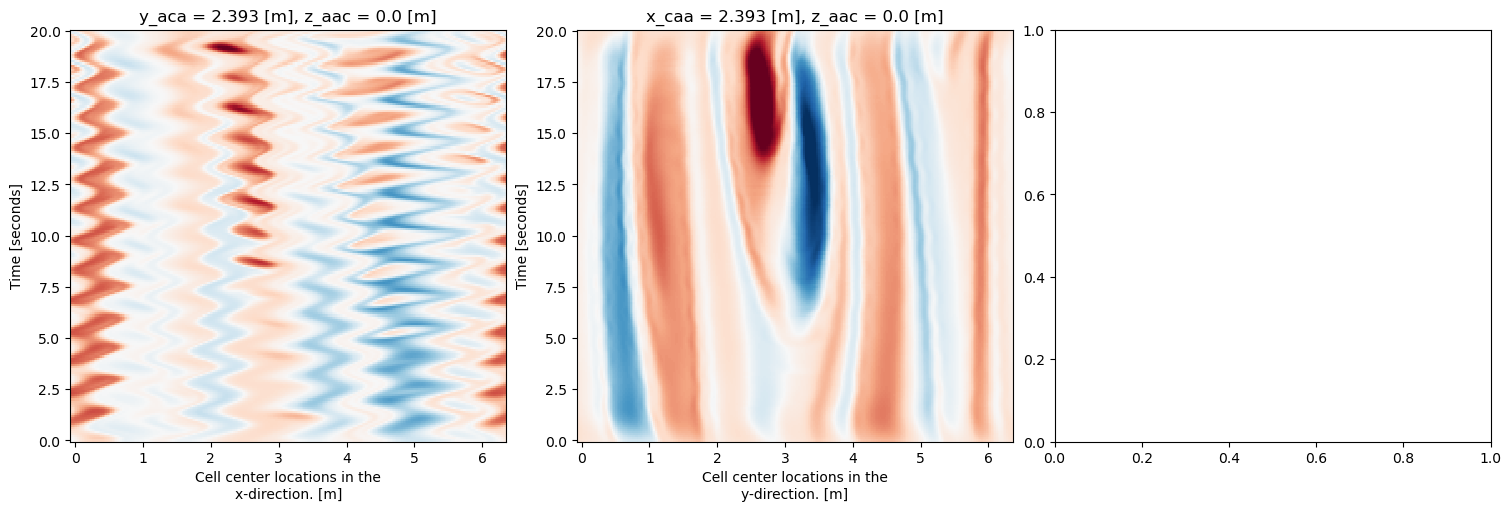

In [56]:
fig, ax = plt.subplots(1,3,figsize = (15,5),constrained_layout=True)
dsO.ω_filtered[:,0,100,:].plot(ax=ax[0], vmin=-1, vmax=1, cmap='RdBu_r', add_colorbar=False)
dsO.ω_filtered_regrid[:,0,:,100].plot(ax=ax[1], vmin=-1, vmax=1, cmap='RdBu_r', add_colorbar=False)